In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

Load data

In [2]:
# Stimuli
uv_stim = np.load('Data/BCs/Stim/uv_flicker.npy')
green_stim = np.load('Data/BCs/Stim/green_flicker.npy')

# Responses 
uv_flicker = np.load('Data/BCs/Cluster Averages/uv_flicker_avrg.npy')
green_flicker = np.load('Data/BCs/Cluster Averages/green_flicker_avrg.npy')

Resample to 64 Hz

In [3]:
# Stimulus
stim_duration = uv_stim.shape[1] * 0.0016 # In seconds
t_stim = np.arange(0, stim_duration, 0.0016) # Old frequency : 625
t_stim_new = np.arange(0, stim_duration, 1/64) # New frequency : 64
uv_stim_new = -99*np.ones((t_stim_new.shape[0],2))
green_stim_new = -99*np.ones((t_stim_new.shape[0],2))

for i in range(2):
    f = interpolate.interp1d(t_stim, uv_stim[i,:], bounds_error = False)
    uv_stim_new[:,i] = f(t_stim_new)
    
    f = interpolate.interp1d(t_stim, green_stim[i,:], bounds_error = False)
    green_stim_new[:,i] = f(t_stim_new)

Remove nans

In [4]:
np.where(t_stim_new > t_stim[-1])

(array([11467]),)

In [5]:
uv_stim_new[11467,:] = uv_stim_new[11466,:]
green_stim_new[11467,:] = green_stim_new[11466,:]

Make stimulus binary

In [6]:
uv_stim_new_binary = uv_stim_new.copy()
uv_stim_new_binary[uv_stim_new<0.5] = 0
uv_stim_new_binary[uv_stim_new>=0.5] = 1

green_stim_new_binary = green_stim_new.copy()
green_stim_new_binary[green_stim_new<0.5] = 0
green_stim_new_binary[green_stim_new>=0.5] = 1

Plot

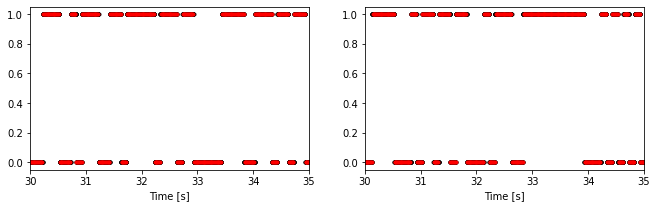

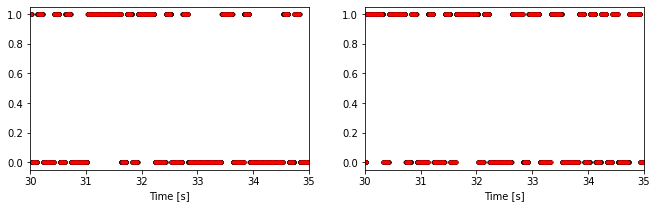

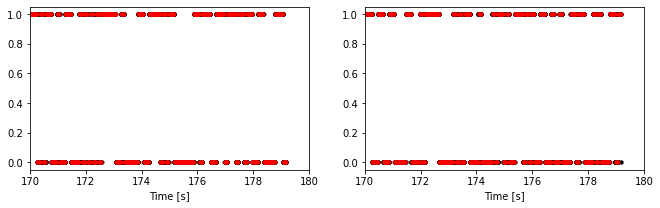

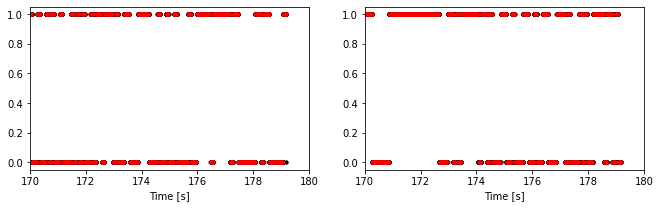

Making binary


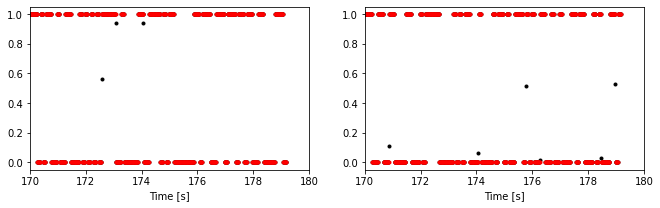

In [7]:
# Plot stim
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
plt.plot(t_stim, uv_stim[0,:], '.', color = 'black')
plt.plot(t_stim_new, uv_stim_new_binary[:,0], '.', color = 'red')
plt.xlim([30,35])
plt.xlabel('Time [s]')

plt.subplot(1,2,2)
plt.plot(t_stim, uv_stim[1,:], '.', color = 'black')
plt.plot(t_stim_new, uv_stim_new_binary[:,1], '.', color = 'red')
plt.xlim([30,35])
plt.xlabel('Time [s]')
plt.show()

plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
plt.plot(t_stim, green_stim[0,:], '.', color = 'black')
plt.plot(t_stim_new, green_stim_new_binary[:,0], '.', color = 'red')
plt.xlim([30,35])
plt.xlabel('Time [s]')

plt.subplot(1,2,2)
plt.plot(t_stim, green_stim[1,:], '.', color = 'black')
plt.plot(t_stim_new, green_stim_new_binary[:,1], '.', color = 'red')
plt.xlim([30,35])
plt.xlabel('Time [s]')
plt.show()


plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
plt.plot(t_stim, uv_stim[0,:], '.', color = 'black')
plt.plot(t_stim_new, uv_stim_new_binary[:,0], '.', color = 'red')
plt.xlim([170,180])
plt.xlabel('Time [s]')

plt.subplot(1,2,2)
plt.plot(t_stim, uv_stim[1,:], '.', color = 'black')
plt.plot(t_stim_new, uv_stim_new_binary[:,1], '.', color = 'red')
plt.xlim([170,180])
plt.xlabel('Time [s]')
plt.show()

plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
plt.plot(t_stim, green_stim[0,:], '.', color = 'black')
plt.plot(t_stim_new, green_stim_new_binary[:,0], '.', color = 'red')
plt.xlim([170,180])
plt.xlabel('Time [s]')

plt.subplot(1,2,2)
plt.plot(t_stim, green_stim[1,:], '.', color = 'black')
plt.plot(t_stim_new, green_stim_new_binary[:,1], '.', color = 'red')
plt.xlim([170,180])
plt.xlabel('Time [s]')
plt.show()


print('Making binary')
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
plt.plot(t_stim_new, uv_stim_new[:,0], '.', color = 'black')
plt.plot(t_stim_new, uv_stim_new_binary[:,0], '.', color = 'red')
plt.xlim([170,180])
plt.xlabel('Time [s]')

plt.subplot(1,2,2)
plt.plot(t_stim_new, uv_stim_new[:,1], '.', color = 'black')
plt.plot(t_stim_new, uv_stim_new_binary[:,1], '.', color = 'red')
plt.xlim([170,180])
plt.xlabel('Time [s]')
plt.show()

Resample to 64 Hz

In [8]:
# Responses
assert stim_duration == uv_flicker.shape[1] * 0.0016

t_resp = np.arange(0, stim_duration, 0.0016) # Old frequency : 625
t_resp_new = np.arange(0, stim_duration, 1/64) # New frequency : 64

uv_flicker_new = -99*np.ones((uv_flicker.shape[0], t_resp_new.shape[0]))
green_flicker_new = -99*np.ones((green_flicker.shape[0], t_resp_new.shape[0]))

for i in range(uv_flicker.shape[0]): # Iterate over number of clusters
    f = interpolate.interp1d(t_resp, uv_flicker[i,:], bounds_error = False)
    uv_flicker_new[i,:] = f(t_resp_new)
    
    f = interpolate.interp1d(t_resp, green_flicker[i,:], bounds_error = False)
    green_flicker_new[i,:] = f(t_resp_new)

In [9]:
np.where(t_stim_new > t_stim[-1])

(array([11467]),)

In [10]:
uv_flicker_new[:,11467] = uv_flicker_new[:,11466]
green_flicker_new[:,11467] = green_flicker_new[:,11466]

Plot example window

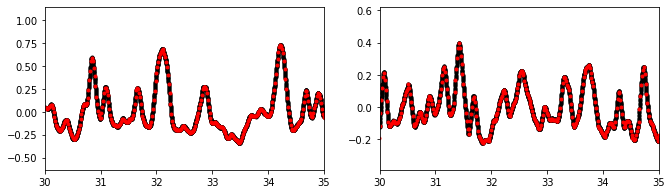

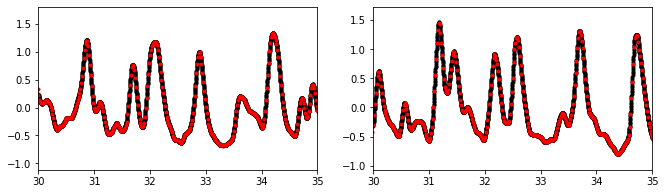

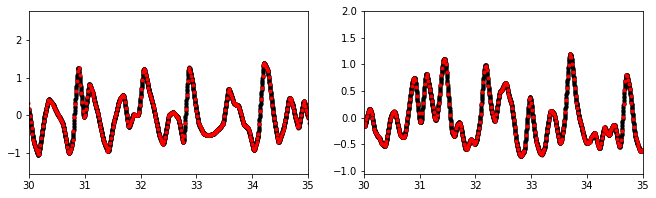

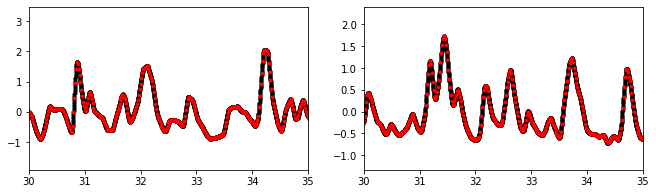

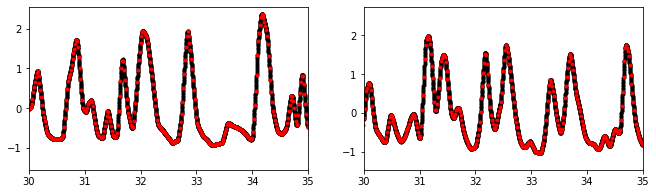

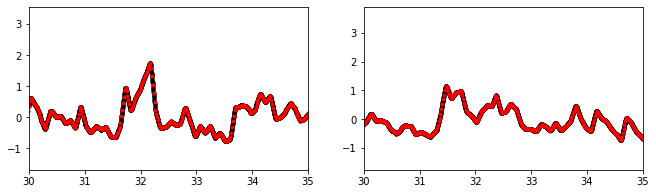

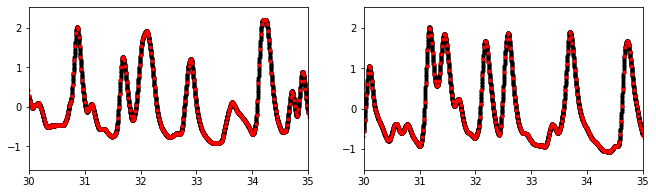

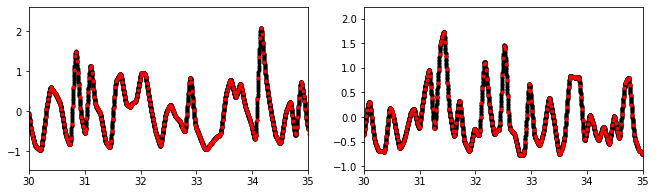

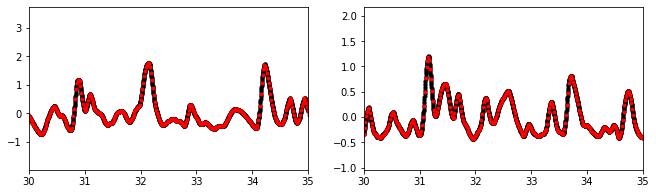

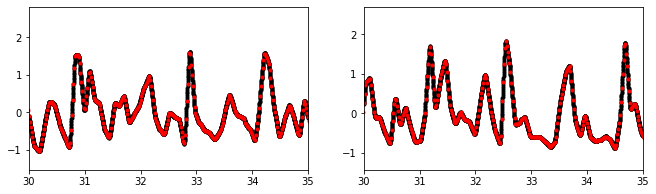

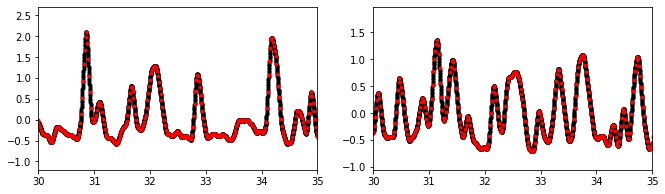

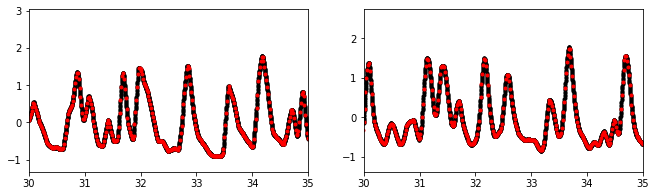

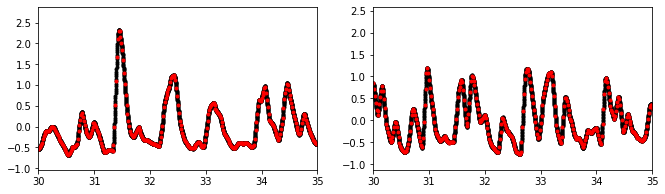

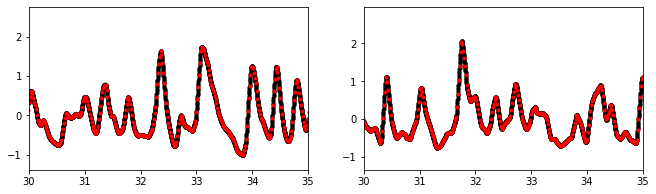

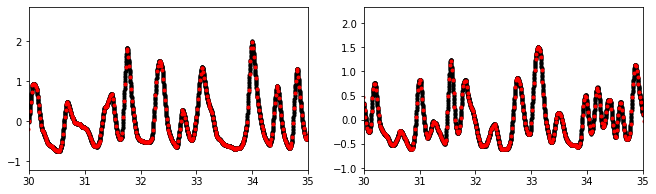

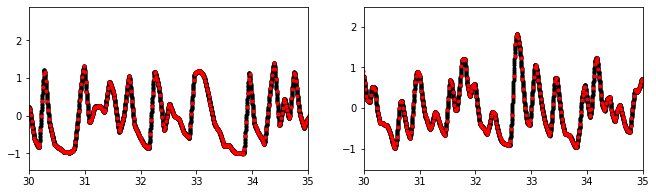

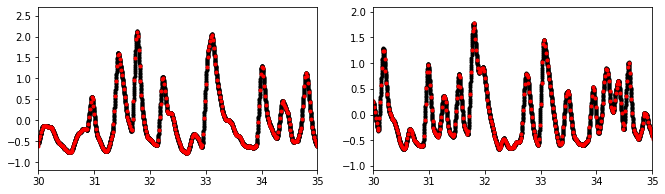

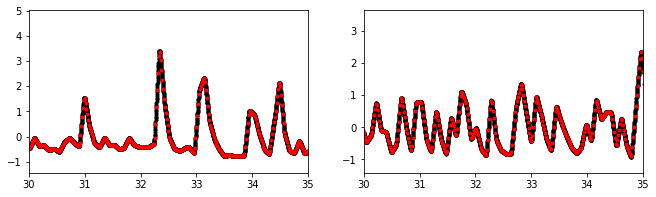

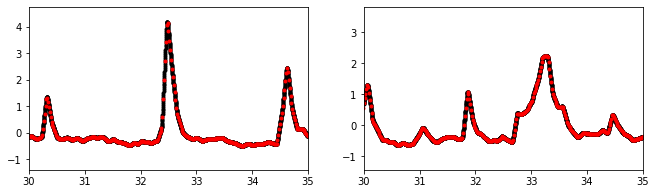

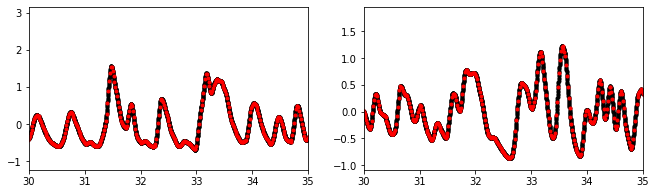

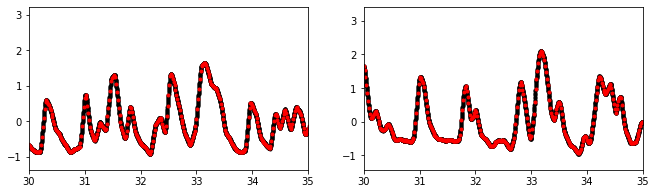

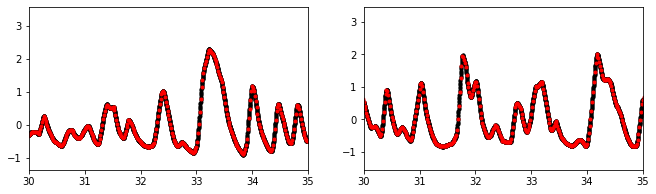

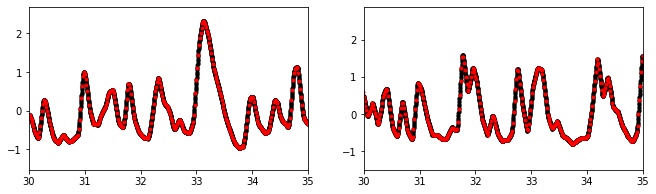

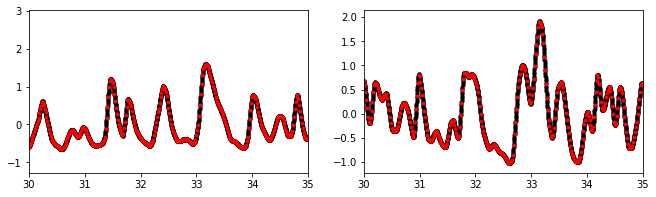

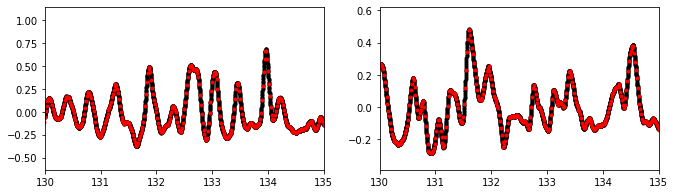

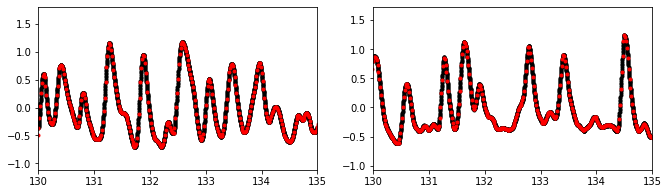

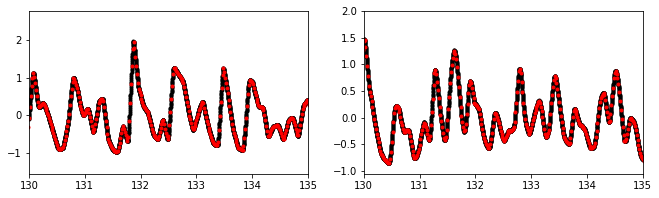

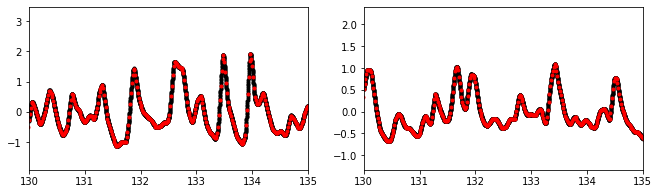

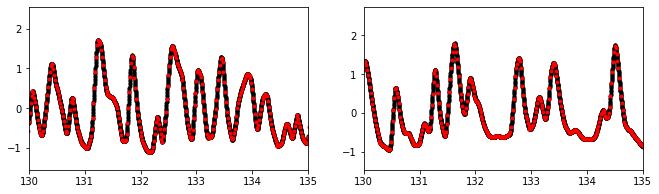

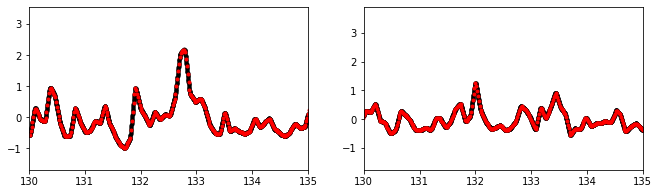

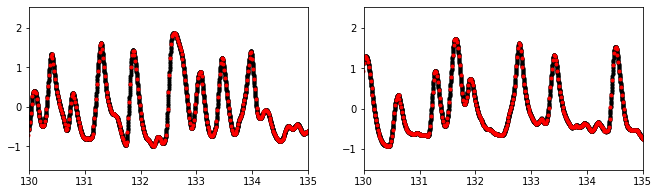

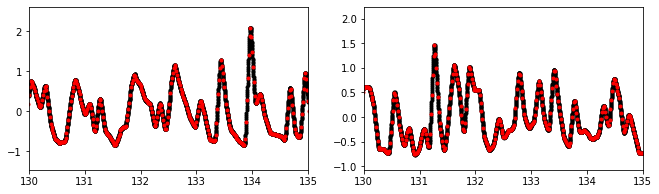

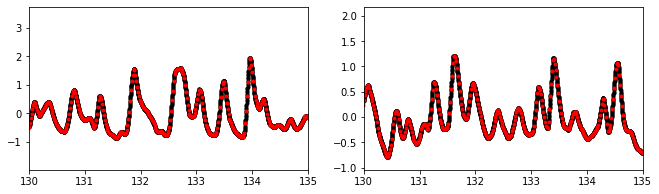

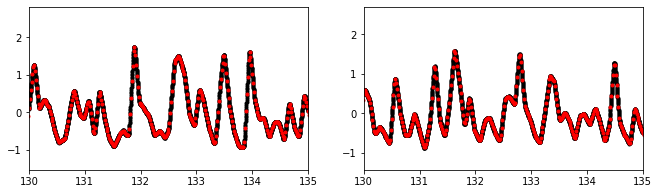

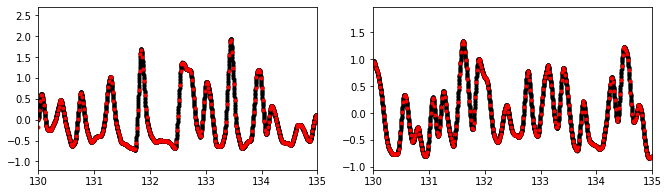

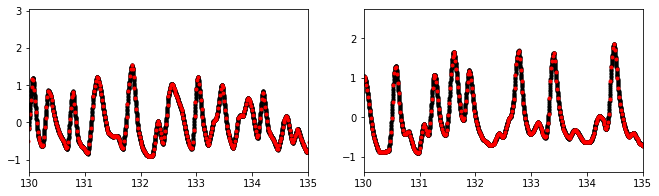

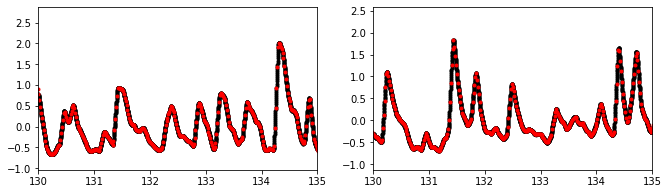

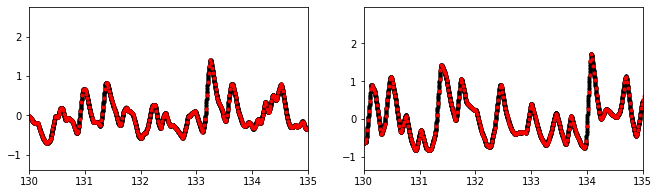

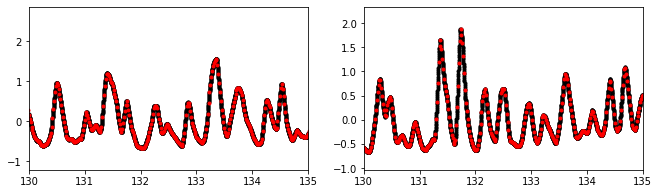

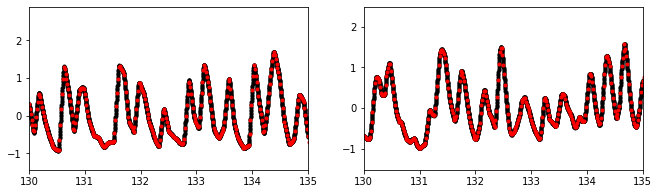

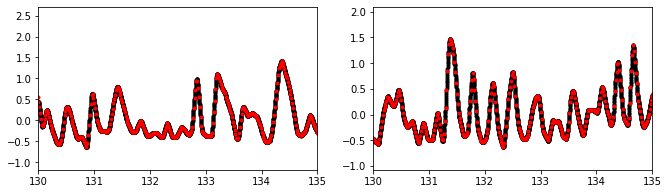

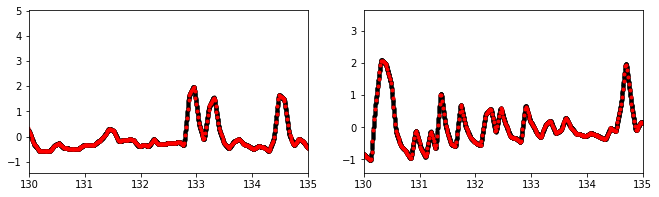

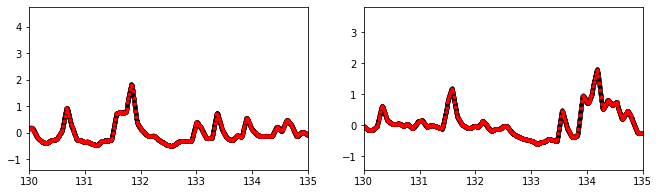

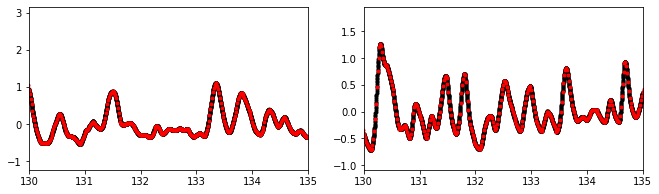

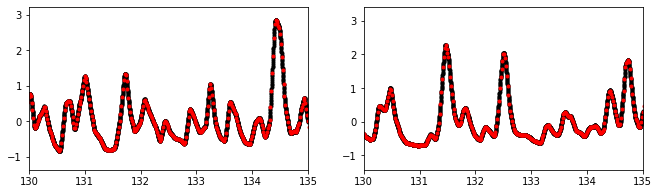

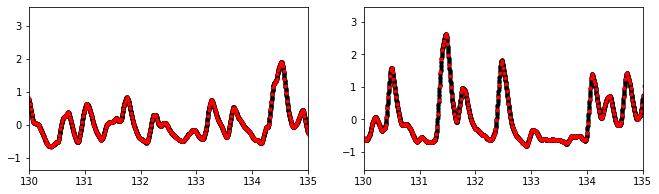

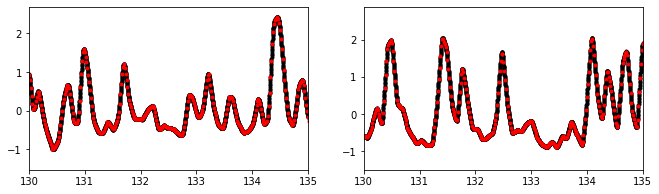

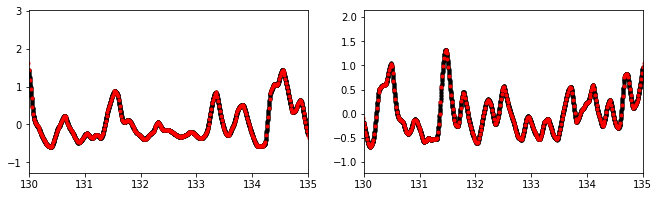

In [11]:
# Plot response
for i in range(uv_flicker.shape[0]):
    plt.figure(figsize=(11,3))
    plt.subplot(1,2,1)
    plt.plot(t_resp, uv_flicker[i,:], '.', color = 'black')
    plt.plot(t_resp_new, uv_flicker_new[i,:], '.', color = 'red')
    plt.xlim([30,35])
    plt.subplot(1,2,2)
    plt.plot(t_resp, green_flicker[i,:], '.', color = 'black')
    plt.plot(t_resp_new, green_flicker_new[i,:], '.', color = 'red')
    plt.xlim([30,35])
    plt.show()
    
for i in range(uv_flicker.shape[0]):
    plt.figure(figsize=(11,3))
    plt.subplot(1,2,1)
    plt.plot(t_resp, uv_flicker[i,:], '.', color = 'black')
    plt.plot(t_resp_new, uv_flicker_new[i,:], '.', color = 'red')
    plt.xlim([130,135])
    plt.subplot(1,2,2)
    plt.plot(t_resp, green_flicker[i,:], '.', color = 'black')
    plt.plot(t_resp_new, green_flicker_new[i,:], '.', color = 'red')
    plt.xlim([130,135])
    plt.show()

Save arrays

In [12]:
np.save('Data/BCs/Model Input Snippets/green_flicker_64Hz.npy', green_stim_new_binary)
np.save('Data/BCs/Model Input Snippets/uv_flicker_64Hz.npy', uv_stim_new_binary)

np.save('Data/BCs/Model Input Snippets/uv_flicker_avrg_64Hz.npy', uv_flicker_new)
np.save('Data/BCs/Model Input Snippets/green_flicker_avrg_64Hz.npy', green_flicker_new)